In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM


In [3]:
pathSnoring = '/content/drive/MyDrive/PAPER HN/Snoring problem/Data/MFCCData_m/Snoring/'
pathNonSnoring = '/content/drive/MyDrive/PAPER HN/Snoring problem/Data/MFCCData_m/NonSnoring/'

listSnoreFile = os.listdir(pathSnoring)
listNonSnoreFile = os.listdir(pathNonSnoring)

In [4]:
train_image = []
label = []

num_feature = 0
for id in range(0, len(listSnoreFile)):
  filePath = os.path.join(pathSnoring, listSnoreFile[id])
  img = np.load(filePath)
  train_image.append(img)
  num_feature += 1
label.extend([1] * num_feature)

num_feature = 0
for id in range(0, len(listNonSnoreFile)):
  filePath = os.path.join(pathNonSnoring, listNonSnoreFile[id])
  img = np.load(filePath)
  train_image.append(img)
  num_feature += 1
label.extend([0] * num_feature)

X, y = np.array(train_image), np.array(label)

In [5]:
print(X.shape)

(1000, 32, 32)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
test = X_test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.222)

In [7]:
model = Sequential()
model.add(LSTM(2))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(optimizer='adam',  loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(X_train,  y_train, epochs=6000, validation_data = (X_test, y_test))

Streaming output truncated to the last 5000 lines.
22/22 [==============================] - 1s 23ms/step - loss: 0.0276 - accuracy: 0.9771 - val_loss: 3.4931 - val_accuracy: 0.8050
Epoch 3502/6000
22/22 [==============================] - 1s 23ms/step - loss: 0.0329 - accuracy: 0.9743 - val_loss: 3.4912 - val_accuracy: 0.8100
Epoch 3503/6000
22/22 [==============================] - 1s 25ms/step - loss: 0.0265 - accuracy: 0.9857 - val_loss: 3.4990 - val_accuracy: 0.8100
Epoch 3504/6000
22/22 [==============================] - 0s 21ms/step - loss: 0.0347 - accuracy: 0.9771 - val_loss: 3.5033 - val_accuracy: 0.8100
Epoch 3505/6000
22/22 [==============================] - 0s 22ms/step - loss: 0.0330 - accuracy: 0.9814 - val_loss: 3.5069 - val_accuracy: 0.8050
Epoch 3506/6000
22/22 [==============================] - 1s 26ms/step - loss: 0.0370 - accuracy: 0.9771 - val_loss: 3.5052 - val_accuracy: 0.8050
Epoch 3507/6000
22/22 [==============================] - 1s 24ms/step - loss: 0.0317 - ac

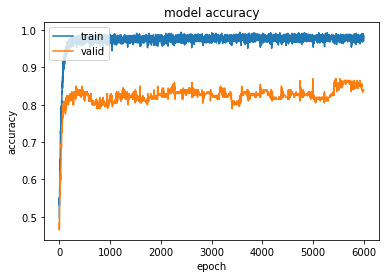

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

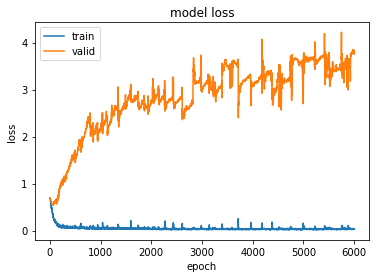

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [14]:
from google.colab import files
model.save('rnn_model.h5')
files.download('rnn_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>